<a href="https://colab.research.google.com/github/jesusGS01/TGINE/blob/main/5_1_Word_embeddings_con_gensim_y_fasttext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesión 5 - Word embeddings (Wor2vec, Glove, Fasttext) y Doc2Vec con GENSIM
En esta sesión se verá cómo utilizar la librería Gensim para el uso de word embeddings.

Los word embeddings son vectores de dimensión n que tratan de capturar el significado de la palabra y de su contexto en ese vector.
Hay distintos modelos de word embeddings preentrenados con grandes corpus que se pueden descargar y utilizar para distintos idiomas.

Primero instalaremos la librería gensim.

In [1]:
# Instalamos gensim
!pip3 install -U gensim

## Apartado 1.1 Descargamos un modelo de word embeddings preentrenado (Resuelto)
En la web https://github.com/dccuchile/spanish-word-embeddings existen distintos modelos de Word-embeddings preentrenados para el idioma español para poder utilizarse con la librería GENSIM.

Se pueden descargar modelos preentrenados para otros idiomas y también se pueden generar modelos basados en Word2vec si se dispone de un corpus de entrenamiento.

Descargamos distintos modelos y los descomprimimos.

In [2]:
# Descargamos Glove para español con formato vec para utilizarse con Gensim
!wget https://dis.um.es/~valencia/recursosTGINE/glove-sbwc.i25.vec.gz
!gzip -d glove-sbwc.i25.vec.gz

# Descargamos Fasttext con formato vec para utilizarse con Gensim
#!wget https://dis.um.es/~valencia/recursosTGINE/embeddings-m-model.vec.gz
#!gzip -d embeddings-m-model.vec.gz
# Descargamos Fasttext con formato binario para utilizarse con la librería Fasttext más adelante en este notebook
#!wget https://dis.um.es/~valencia/recursosTGINE/embeddings-m-model.bin.gz
#!gzip -d embeddings-m-model.bin.gz

# Esta es una versión muy reducida de fasttext
# Descargamos esta versión muy reducida de fasttext desde un ordenador de la Facultad para ir más rápido.
# Los enlaces originales son los siguientes
# https://zenodo.org/record/3234051/files/embeddings-s-model.vec
# https://zenodo.org/record/3234051/files/embeddings-s-model.bin

!wget https://dis.um.es/~valencia/recursosTGINE/embeddings-s-model_vec.zip
!unzip embeddings-s-model_vec.zip
!wget https://dis.um.es/~valencia/recursosTGINE/embeddings-s-model_bin.zip
!unzip embeddings-s-model_bin.zip

# Descargamos el dataset en español que hemos usado en otras prácticas
!wget https://dis.um.es/~valencia/recursosTGINE/datasetEspañol.csv

--2023-11-09 17:06:41--  https://dis.um.es/~valencia/recursosTGINE/glove-sbwc.i25.vec.gz
Resolving dis.um.es (dis.um.es)... 155.54.239.5
Connecting to dis.um.es (dis.um.es)|155.54.239.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 949886421 (906M) [application/x-gzip]
Saving to: ‘glove-sbwc.i25.vec.gz’

glove-sbwc.i25.vec. 100%[===================>] 905.88M  2.21MB/s    in 3m 46s  

2023-11-09 17:10:28 (4.01 MB/s) - ‘glove-sbwc.i25.vec.gz’ saved [949886421/949886421]

--2023-11-09 17:10:56--  https://dis.um.es/~valencia/recursosTGINE/embeddings-s-model_vec.zip
Resolving dis.um.es (dis.um.es)... 155.54.239.5
Connecting to dis.um.es (dis.um.es)|155.54.239.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145615640 (139M) [application/zip]
Saving to: ‘embeddings-s-model_vec.zip’

embeddings-s-model_ 100%[===================>] 138.87M  4.47MB/s    in 38s     

2023-11-09 17:11:34 (3.67 MB/s) - ‘embeddings-s-model_vec.zip’ saved [145615

In [3]:
 from gensim.models.keyedvectors import KeyedVectors
 import gensim
# Cargamos el modelo de Glove en Gensim
 glove_gensim_model = KeyedVectors.load_word2vec_format("glove-sbwc.i25.vec")

 # Podemos cargar también los embeddings de Fasttext
 #glove_gensim_model = KeyedVectors.load_word2vec_format("embeddings-l-model.vec")
 #glove_gensim_model = KeyedVectors.load_word2vec_format("embeddings-s-model.vec")


# Apartado 1.2 Trabajando con los vectores de palabras

Imprimimos los vectores de la palabra "murcia" con el conjunto preentrenado de embeddings cargado en la celda anterior.

In [4]:
word = 'murcia'
if (glove_gensim_model.has_index_for(word)):
  word_embedding = glove_gensim_model.get_vector(word)
  print(word_embedding)
else:
  print("No hay")


[-3.656140e-01 -7.726400e-02 -3.453140e-01  3.784510e-01  5.509520e-01
  7.791450e-01  1.930980e-01 -2.017900e-01  4.325410e-01 -3.591510e-01
 -2.171490e-01 -4.661000e-02 -1.507420e-01 -5.372530e-01 -6.381500e-02
 -1.682300e-02  3.247740e-01  6.102940e-01  1.771200e-02 -1.867500e-01
 -4.248650e-01 -5.492500e-02 -6.588880e-01 -9.319100e-02 -3.907310e-01
  1.025280e-01  1.813590e-01 -8.561530e-01 -2.420600e-01 -2.670810e-01
  1.172870e-01 -7.581530e-01 -6.400780e-01 -2.704500e-01  4.966670e-01
  4.087800e-02  2.864520e-01 -1.676000e-01 -1.047870e-01 -1.315530e-01
  2.766780e-01 -8.961800e-02  5.554080e-01  6.324280e-01 -5.707100e-02
  5.473200e-02  6.542500e-02 -7.566900e-02  1.889600e-01  9.553340e-01
 -2.378920e-01  1.351420e-01 -1.230620e-01 -4.141340e-01  1.375230e-01
  1.922550e-01 -1.487710e-01  6.967900e-02 -1.411010e-01 -7.715290e-01
  2.090640e-01  1.305900e-01 -4.264560e-01 -1.915020e-01 -3.440000e-04
  4.942900e-02  4.461290e-01 -9.311400e-02 -4.274040e-01  1.811320e-01
  2.23

Con los word embeddings podemos calcular la similitud de distintos términos usando la similidud del coseno. Para eso Gensim proporciona una función para determinar su similitud.

In [5]:
# Calculamos la similitud entre las palabras alumno y estudiante
palabra1="alumno"
palabra2="estudiante"
sim = glove_gensim_model.similarity(palabra1, palabra2)
print('La similitud entre '+palabra1+' y '+palabra2+' es:',sim)

# Calculamos la similitud entre 'españa' y 'francia'
palabra1="españa"
palabra2="francia"
sim = glove_gensim_model.similarity(palabra1, palabra2)
print('La similitud entre '+palabra1+' y '+palabra2+' es:',sim)

# Calculamos la similitud entre 'españa' y 'madrid'
palabra1="españa"
palabra2="madrid"
sim = glove_gensim_model.similarity(palabra1, palabra2)
print('La similitud entre '+palabra1+' y '+palabra2+' es:',sim)

# Calculamos la similitud entre 'españa' y 'alumno'
palabra1="españa"
palabra2="alumno"
sim = glove_gensim_model.similarity(palabra1, palabra2)
print('La similitud entre '+palabra1+' y '+palabra2+' es:',sim)

# Calculamos la similitud entre 'rojo' y 'azul'
palabra1="rojo"
palabra2="azul"
sim = glove_gensim_model.similarity(palabra1, palabra2)
print('La similitud entre '+palabra1+' y '+palabra2+' es:',sim)


La similitud entre alumno y estudiante es: 0.7361078
La similitud entre españa y francia es: 0.6711971
La similitud entre españa y madrid es: 0.71405333
La similitud entre españa y alumno es: 0.21474718
La similitud entre rojo y azul es: 0.7384808


# Apartado 1.3 Obtenemos términos similares

Con los word embeddings podemos obtener los términos más similares con respecto a uno dado.

In [6]:
# Imprimimos las palabras más similares a 'madrid'
palabra = 'madrid'
print(glove_gensim_model.most_similar(palabra))

# Imprimimos las palabras más similares a 'españa'
palabra = 'españa'
print(glove_gensim_model.most_similar(palabra))

# Imprimimos las palabras más similares a 'tenis'
palabra = 'tenis'
print(glove_gensim_model.most_similar(palabra))

# Imprimimos las palabras más similares a 'amarillo'
palabra = 'amarillo'
print(glove_gensim_model.most_similar(palabra))


[('barcelona', 0.7481707334518433), ('valencia', 0.7286534309387207), ('sevilla', 0.7230772972106934), ('españa', 0.7140534520149231), ('valladolid', 0.6981064677238464), ('zaragoza', 0.680424690246582), ('málaga', 0.6680708527565002), ('bilbao', 0.665088951587677), ('real', 0.6523774862289429), ('española', 0.6463478803634644)]
[('española', 0.7366926074028015), ('madrid', 0.7140533328056335), ('francia', 0.6711971759796143), ('portugal', 0.6674736738204956), ('europa', 0.6646955013275146), ('español', 0.662998378276825), ('país', 0.6526250839233398), ('espańa', 0.6497336030006409), ('españolas', 0.6376960873603821), ('italia', 0.6304250359535217)]
[('baloncesto', 0.639200747013092), ('golf', 0.6366766095161438), ('voleibol', 0.624140739440918), ('atletismo', 0.614983856678009), ('canchas', 0.605154275894165), ('fútbol', 0.6021850109100342), ('torneos', 0.5784527659416199), ('natación', 0.5733251571655273), ('deporte', 0.5721799731254578), ('hockey', 0.5662410259246826)]
[('rojo', 0.7

# Apartado 1.4 Haciendo analogías

Con las similitudes de word embeddings se pueden hacer analogías haciendo operaciones con los vectores.

Por ejemplo, podríamos hacer la siguiente analogía:

*francés* es a *Francia* lo que *Italiano* es a ...

In [10]:
  # Francés es a Francia lo que Italiano es a ...
  print(glove_gensim_model.most_similar(positive=["italiano", "francia"], negative=["francés"], topn=1))

  # Francia es a París lo que España es a ...
  print(glove_gensim_model.most_similar(positive=["españa", "paris"], negative=["francia"], topn=1))

  # Hombre es a rey lo que mujer es a ...
  print(glove_gensim_model.most_similar(positive=["mujer", "rey"], negative=["hombre"], topn=1))

  # Cantar es a cantaba lo que temer es a ...
  print(glove_gensim_model.most_similar(positive=["temer", "cantaba"], negative=["cantar"], topn=1))

  # Enfermera es a hospital lo que juez es a ...
  print(glove_gensim_model.most_similar(positive=["juez", "hospital"], negative=["enfermera"], topn=1))


[('italia', 0.8575731515884399)]
[('madrid', 0.5490846037864685)]
[('reina', 0.6732203364372253)]
[('temía', 0.43924930691719055)]
[('juzgado', 0.6214022636413574)]


También se pueden mostrar más de 1 opción y no solamente la primera opción de la analogía.

In [13]:
  # Francés es a Francia lo que Italiano es a ...
  print(glove_gensim_model.most_similar(positive=["italiano", "francia"], negative=["francés"], topn=10))

  # Francia es a París lo que España es a ,,,
  print(glove_gensim_model.most_similar(positive=["españa", "paris"], negative=["francia"], topn=10))

  # Hombre es a rey lo que mujer es a ...
  print(glove_gensim_model.most_similar(positive=["mujer", "rey"], negative=["hombre"], topn=10))

  # Cantar es a cantaba lo que temer es a ...
  print(glove_gensim_model.most_similar(positive=["temer", "cantaba"], negative=["cantar"], topn=10))

  # Enfermera es a hospital lo que juez es a ...
  print(glove_gensim_model.most_similar(positive=["juez", "hospital"], negative=["enfermera"], topn=10))

  # Enfermera es a hospital lo que profesor es a ...
  print(glove_gensim_model.most_similar(positive=["profesor", "hospital"], negative=["enfermera"], topn=10))


[('italia', 0.8575731515884399), ('italiana', 0.6234793066978455), ('roma', 0.6066861152648926), ('italianos', 0.5899349451065063), ('nápoles', 0.5797626376152039), ('milán', 0.5797608494758606), ('españa', 0.5516084432601929), ('portugal', 0.5490608811378479), ('alemania', 0.5487722754478455), ('grecia', 0.539060115814209)]
[('madrid', 0.5490846037864685), ('barcelona', 0.4903126060962677), ('hilton', 0.4579368233680725), ('sevilla', 0.4526287019252777), ('español', 0.44700783491134644), ('valencia', 0.43792077898979187), ('española', 0.4333660900592804), ('habana', 0.430776447057724), ('abc', 0.4239005446434021), ('málaga', 0.4226822257041931)]
[('reina', 0.6732203364372253), ('isabel', 0.5993215441703796), ('monarca', 0.5833542346954346), ('princesa', 0.5566388368606567), ('hija', 0.5369765162467957), ('infanta', 0.5317001938819885), ('esposa', 0.5256122350692749), ('alfonso', 0.5193145871162415), ('iv', 0.5174581408500671), ('ii', 0.5153015851974487)]
[('temía', 0.43924930691719055

## Apartado 1.5 Detectando el término no relacionados

También hay una función que permite determinar el término que no está relacionado con los demás términos

In [14]:
print(glove_gensim_model.doesnt_match(['blanco','azul','rojo','amarillo','verde','calamar']))

# Ver qué palabra no encaja en la siguiente lista 'tenis', 'fútbol', 'baloncesto', 'informática', 'gimnasia'
print(glove_gensim_model.doesnt_match(['tenis', 'fútbol', 'baloncesto', 'informática', 'gimnasia']))

calamar
informática


# Apartado 1.6 Visualización de *vectores de palabras*

En el siguiente ejemplo, se puede ver la visualización gráfica en 2D de la distancia entre distintas familias de palabras.

In [15]:
# Función para pintar las palabras en una gráfica
!pip3 install pandas
!pip3 install sklearn
!pip3 install nltk
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
def display_wordlist(model, wordlist):
    vectors = [model[word] for word in wordlist if model.has_index_for(word)]
    word_labels = [word for word in wordlist if model.has_index_for(word)]
    word_vec_zip = zip(word_labels, vectors)

    # Convert to a dict and then to a DataFrame
    word_vec_dict = dict(word_vec_zip)
    df = pd.DataFrame.from_dict(word_vec_dict, orient='index')

    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=len(wordlist)).fit_transform(df)

    # Use tsne to reduce to 2 dimensions
    tsne = TSNE(perplexity=5,n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(reduc)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display plot
    plt.figure(figsize=(16, 8))
    plt.plot(x_coords, y_coords, 'ro')

    for label, x, y in zip(df.index, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points')
    plt.xlim(Y[:, 0].min()-10, Y[:, 0].max()+10)
    plt.ylim(Y[:, 1].min()-10, Y[:, 1].max()+10)
    plt.show()



  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


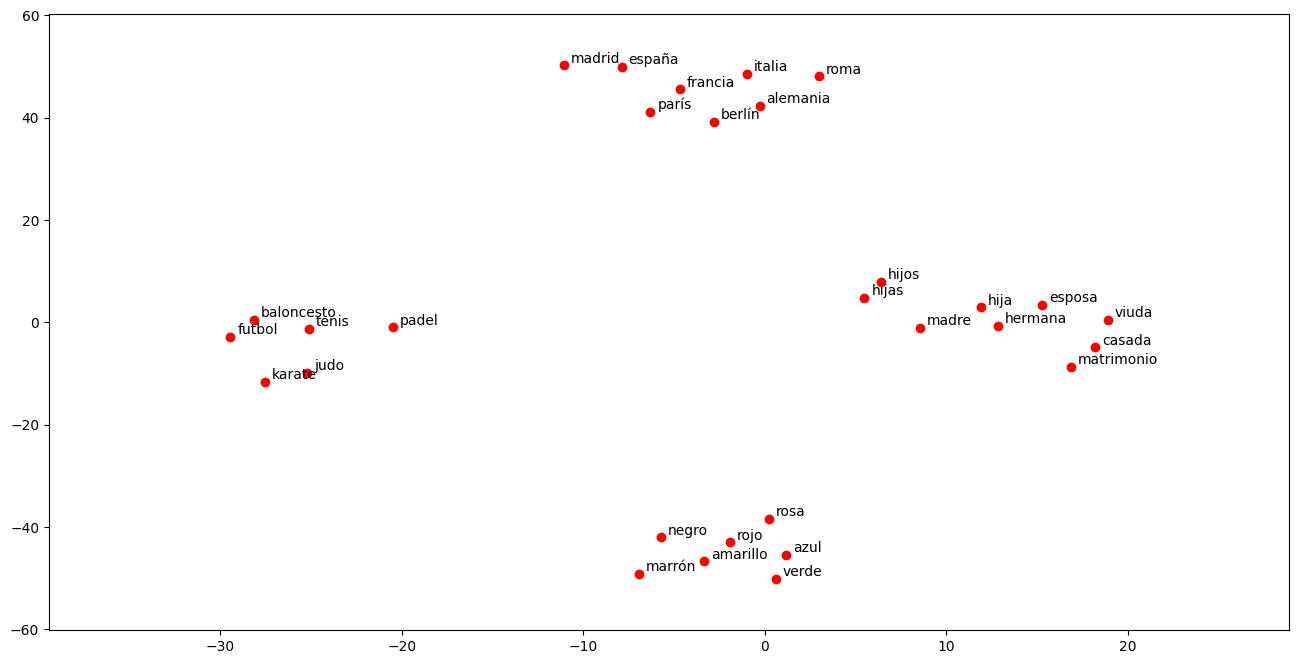

In [16]:
# Visualizamos algunas palabras
display_wordlist(glove_gensim_model, ['judo', 'karate','baloncesto','tenis','futbol','padel',
                                      'hija','esposa','hijos','madre','hermana','hijas','matrimonio','viuda', 'casada',
                                      'españa','madrid','francia','parís','italia','roma','alemania','berlín',
                                      'azul','verde','rosa','amarillo','rojo','marrón','negro'])


# Apartado 1.7 Sentence embeddings

Se pueden representar fragmentos de texto como frases o párrafos a partir de un vector de dimensión 300 simplemente haciendo una media aritmética de los vectores de los Tokens o palabras que aparecen en ese fragmento de texto.

In [17]:
# Esta función calcula en un único vector de dimensión 300 la media aritmética de todos los vectores de tokens
# de un array de textos dado.
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def gensim_sentence_embeddings(textos, model, idiomaStopWords):
    import nltk
    from nltk.corpus import stopwords
    from gensim.test.utils import datapath
    import unicodedata
    from tqdm import tqdm
    import gensim
    import multiprocessing
    import random
    import numpy as np
#esta función devuelve los sentence embeddings de todos los textos enviados como parámetros
    stopwords_list=stopwords.words(idiomaStopWords)
    sentence_embeddings = []
    for linea in textos:
        line_vec = []
        tokenized_sentence = nltk.tokenize.word_tokenize(linea)
        count = 0
        for token in tokenized_sentence:
           if (token not in stopwords_list):
            # Solamente calculamos los vectores de lo que no son stopwords
            if model.has_index_for(token):
              a = model.get_vector(token)
              if len(line_vec) == 0 :
                line_vec = a
              else:
                line_vec = line_vec + a
              count = count + 1
        if(count>0):
          sentence_embeddings.append(line_vec/count)
        else:
          sentence_embeddings.append(np.zeros(300))
    return sentence_embeddings

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
# Podemos calcular e imprimir los sentence embedings de varias frases.
# Hay que tener en cuenta que si no existe ningún token conocido en el vocabulario obtendríamos un vector de 0s
print(gensim_sentence_embeddings(['me gusta el día','30 203 44 500'], glove_gensim_model, 'spanish'))

[array([-0.349078  ,  0.507492  ,  0.08748849,  0.075181  ,  0.41746402,
        0.153205  , -0.084192  , -0.119025  , -0.1831935 , -0.0863425 ,
        0.09947   , -0.31287402, -0.16599   , -0.2461395 , -0.0547855 ,
        0.175206  , -0.14683099, -0.22833401,  0.1333065 ,  0.133404  ,
        0.202594  , -0.40680903, -0.119038  ,  0.3530755 , -0.24087352,
       -0.142318  , -0.0263255 ,  0.4711605 ,  0.056111  , -0.0960695 ,
       -0.1043075 ,  0.086165  , -0.176049  ,  0.2322525 ,  0.420517  ,
        0.0375215 ,  0.1063065 ,  0.136041  , -0.2609045 , -0.0896395 ,
        0.24515101,  0.2675775 , -0.11715201,  0.10227349, -0.0863855 ,
       -0.020269  ,  0.1159125 , -0.0247315 , -0.20177649,  0.27471098,
       -0.0417205 , -0.168485  ,  0.0662695 ,  0.0138565 , -0.007159  ,
       -0.029278  , -0.190077  ,  0.091889  ,  0.045938  , -0.0584965 ,
        0.169811  , -0.0374755 ,  0.0188535 ,  0.54072297,  0.06889849,
       -0.04251   ,  0.015499  , -0.0302485 ,  0.3256605 , -0.1

Podemos probar ahora mediante sentence embeddings cómo pueden parecerse distintos fragmentos de texto o documentos mediante el uso de la similitud del coseno.

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
# Definimos un conjunto de textos
textos=['El procesamiento del lenguaje natural (PLN o NLP) es un campo dentro de la inteligencia artificial y la lingüística aplicada que estudia las interacciones mediante uso del lenguaje natural entre los seres humanos y las máquinas. \
Más concretamente se centra en el procesamiento de las comunicaciones humanas, dividiéndolas en partes, e identificando los elementos más relevantes del mensaje.\
Con la Comprensión y Generación de Lenguaje Natural, busca que las máquinas consigan entender, interpretar y manipular el lenguaje humano.'
, 'El procesamiento del lenguaje natural (NLP, por sus siglas en inglés) es una rama de la inteligencia artificial que ayuda a las computadoras a entender, interpretar y manipular el lenguaje humano. \
NLP toma elementos prestados de muchas disciplinas, incluyendo la ciencia de la computación y la lingüística computacional, en su afán por cerrar la brecha entre la comunicación humana y el entendimiento de las computadoras."""], """El procesamiento del lenguaje natural (PLN o NLP) es un campo dentro de la inteligencia artificial y la lingüística aplicada que estudia las interacciones mediante uso del lenguaje natural entre los seres humanos y las máquinas. Más concretamente se centra en el procesamiento de las comunicaciones humanas, dividiéndolas en partes, e identificando los elementos más relevantes del mensaje. Con la Comprensión y Generación de Lenguaje Natural, busca que las máquinas consigan entender, interpretar y manipular el lenguaje humano.'
, 'La lingüística computacional es un campo interdisciplinario que se ocupa del desarrollo de formalismos del funcionamiento del lenguaje natural, tales que puedan ser transformados en programas ejecutables para un ordenador. \
Dicho desarrollo se sitúa entre el modelado basado en reglas y el modelado estadístico del lenguaje natural desde una perspectiva computacional, y en él participan lingüistas e informáticos especializados en inteligencia artificial, psicólogos cognoscitivos y expertos en lógica, entre otros.'
, 'El aprendizaje automático es un tipo de inteligencia artificial (AI) que proporciona a las computadoras la capacidad de aprender, sin ser programadas explícitamente. El aprendizaje automático se centra en el desarrollo de programas informáticos que pueden cambiar cuando se exponen a nuevos datos.'
, 'El  aprendizaje profundo es un tema que cada vez adquiere mayor relevancia en el campo de la inteligencia artificial (IA). Siendo una subcategoría del aprendizaje automático, el aprendizaje profundo trata del uso de redes neuronales para mejorar cosas tales como el reconocimiento de voz, la visión por ordenador y el procesamiento del lenguaje natural. \
Rápidamente se está convirtiendo en uno de los campos más solicitados en informática. \
En los últimos años, el aprendizaje profundo ha ayudado a lograr avances en áreas tan diversas como la percepción de objetos, el procesamiento del lenguaje natural y el reconocimiento de voz (todas ellas áreas especialmente complejas para los investigadores en IA).',
'El coste de la energía va a subir mucho los próximos meses y la población va a tener que pagar cantidades excesivas a las eléctricas']

# Calculamos la similitud usando sentence embeddings
sentence_embeddings = gensim_sentence_embeddings(textos, glove_gensim_model,'spanish')
import numpy as np
import scipy.sparse as sp
if not sp.issparse(sentence_embeddings):
            sentence_embeddings = sp.csr_matrix(sentence_embeddings, dtype=np.float64)

# Calculamos la similitud de los documentos con el coseno para sentence embeddings
results = cosine_similarity(sentence_embeddings[1::],sentence_embeddings[0]).reshape(-1,) # Op -- (n_docs,1) -- Cosine Sim with each doc
print(results)

[0.98916187 0.91941754 0.88821989 0.94367842 0.73421973]


Probamos ahora a entrenar el dataset de la sesión anterior *Sesión 4* para probar su accuracy utilizando word embeddings preentrenados.

In [20]:
import pandas
df = pandas.read_csv("datasetEspañol.csv",encoding="UTF-8")

p_train = 0.80 # Porcentaje de train.
p_test = 0.20 # Porcentaje de train.

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = p_test)

# Ponemos en lower_case los dos conjuntos de tweets
df_train.tweet = df_train.tweet.apply(lambda x: x.lower())
df_test.tweet = df_test.tweet.apply(lambda x: x.lower())

print("Ejemplos usados para entrenar: ", len(df_train))
print("Ejemplos usados para test: ", len(df_test))

Ejemplos usados para entrenar:  4767
Ejemplos usados para test:  1192


In [21]:
from sklearn.svm import LinearSVC
sentence_train = gensim_sentence_embeddings(df_train.tweet, glove_gensim_model,'spanish')
sentence_test = gensim_sentence_embeddings(df_test.tweet, glove_gensim_model,'spanish')

clf_sentence_embeddings = LinearSVC(random_state=0, tol=1e-5).fit(sentence_train, df_train.label)
predicted = clf_sentence_embeddings.predict(sentence_test)
np.mean(predicted == df_test.label)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8204697986577181

## Apartado 1.8 Sentence embeddings de Fasttext

Nosotros hemos implementado una función para obtener los sentence embeddings directamente desde la librería Fasttext. Fasttext es otro tipo de word embeddings donde se tienen en cuenta los char n gramas.

In [22]:
# Instalamos la librería Fasttext y descargamos el modelo preentrenado para el español en binario
!pip3 install fasttext
import fasttext
# Los word embeddings preentrenados ya se han descargado anteriormente

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199772 sha256=46c0816e90c2912bf0f2023024400967291fb0330a04396dfce89a8caff851cf
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [23]:
# Cargamos el modelo usando la librería fasttext.
# Esta librería es distinta de Gensim
#ft_model = fasttext.load_model ("embeddings-l-model.bin")
ft_model = fasttext.load_model ("embeddings-s-model.bin")

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
# Definimos un conjunto de textos
textos=['El procesamiento del lenguaje natural (PLN o NLP) es un campo dentro de la inteligencia artificial y la lingüística aplicada que estudia las interacciones mediante uso del lenguaje natural entre los seres humanos y las máquinas. \
Más concretamente se centra en el procesamiento de las comunicaciones humanas, dividiéndolas en partes, e identificando los elementos más relevantes del mensaje.\
Con la Comprensión y Generación de Lenguaje Natural, busca que las máquinas consigan entender, interpretar y manipular el lenguaje humano.'
, 'El procesamiento del lenguaje natural (NLP, por sus siglas en inglés) es una rama de la inteligencia artificial que ayuda a las computadoras a entender, interpretar y manipular el lenguaje humano. \
NLP toma elementos prestados de muchas disciplinas, incluyendo la ciencia de la computación y la lingüística computacional, en su afán por cerrar la brecha entre la comunicación humana y el entendimiento de las computadoras."""], """El procesamiento del lenguaje natural (PLN o NLP) es un campo dentro de la inteligencia artificial y la lingüística aplicada que estudia las interacciones mediante uso del lenguaje natural entre los seres humanos y las máquinas. Más concretamente se centra en el procesamiento de las comunicaciones humanas, dividiéndolas en partes, e identificando los elementos más relevantes del mensaje. Con la Comprensión y Generación de Lenguaje Natural, busca que las máquinas consigan entender, interpretar y manipular el lenguaje humano.'
, 'La lingüística computacional es un campo interdisciplinario que se ocupa del desarrollo de formalismos del funcionamiento del lenguaje natural, tales que puedan ser transformados en programas ejecutables para un ordenador. \
Dicho desarrollo se sitúa entre el modelado basado en reglas y el modelado estadístico del lenguaje natural desde una perspectiva computacional, y en él participan lingüistas e informáticos especializados en inteligencia artificial, psicólogos cognoscitivos y expertos en lógica, entre otros.'
, 'El aprendizaje automático es un tipo de inteligencia artificial (AI) que proporciona a las computadoras la capacidad de aprender, sin ser programadas explícitamente. El aprendizaje automático se centra en el desarrollo de programas informáticos que pueden cambiar cuando se exponen a nuevos datos.'
, 'El  aprendizaje profundo es un tema que cada vez adquiere mayor relevancia en el campo de la inteligencia artificial (IA). Siendo una subcategoría del aprendizaje automático, el aprendizaje profundo trata del uso de redes neuronales para mejorar cosas tales como el reconocimiento de voz, la visión por ordenador y el procesamiento del lenguaje natural. \
Rápidamente se está convirtiendo en uno de los campos más solicitados en informática. \
En los últimos años, el aprendizaje profundo ha ayudado a lograr avances en áreas tan diversas como la percepción de objetos, el procesamiento del lenguaje natural y el reconocimiento de voz (todas ellas áreas especialmente complejas para los investigadores en IA).',
'El coste de la energía va a subir mucho los próximos meses y la población va a tener que pagar cantidades excesivas a las eléctricas']


import pandas as pd
df_textos = pd.DataFrame(textos)

# Calculamos la similitud usando sentence embeddings
fasttext_sentence_embeddings = df_textos[0].apply(lambda x: ft_model.get_sentence_vector(x))
fasttext_sentence_embeddings = fasttext_sentence_embeddings.to_list()
import numpy as np

import scipy.sparse as sp
if not sp.issparse(fasttext_sentence_embeddings):
            fasttext_sentence_embeddings = sp.csr_matrix(fasttext_sentence_embeddings, dtype=np.float64)

# Calculamos la similitud de los documentos con el coseno para sentence embeddings
results = cosine_similarity(fasttext_sentence_embeddings[1::],fasttext_sentence_embeddings[0]).reshape(-1,) # Op -- (n_docs,1) -- Cosine Sim with each doc
print(results)

[0.99586123 0.97653438 0.96497823 0.97840502 0.85345728]


Entrenamos ahora con los sentence embeddings de fasttext y obtenemos el accuracy

In [25]:
from sklearn.svm import LinearSVC
fasttext_sentence_train = df_train.tweet.apply(lambda x: ft_model.get_sentence_vector(x))
fasttext_sentence_test = df_test.tweet.apply(lambda x: ft_model.get_sentence_vector(x))

clf_sentence_embeddings = LinearSVC(random_state=0, tol=1e-5).fit(fasttext_sentence_train.to_list(), df_train.label)
predicted = clf_sentence_embeddings.predict(fasttext_sentence_test.to_list())
np.mean(predicted == df_test.label)

0.7927852348993288

In [26]:
#Si probamos con unos vectores de Fasttext de más dimensiones (100) en principio la clasificación debería ser mejor.
!wget https://dis.um.es/~valencia/recursosTGINE/embeddings-m-model.bin.gz
!gzip -d embeddings-m-model.bin.gz

--2023-11-09 18:05:32--  https://dis.um.es/~valencia/recursosTGINE/embeddings-m-model.bin.gz
Resolving dis.um.es (dis.um.es)... 155.54.239.5
Connecting to dis.um.es (dis.um.es)|155.54.239.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1738664259 (1.6G) [application/x-gzip]
Saving to: ‘embeddings-m-model.bin.gz’

-model.bin.gz         9%[>                   ] 153.70M  3.19MB/s    eta 8m 54s ^C

gzip: embeddings-m-model.bin.gz: unexpected end of file


In [27]:
#Cargamos el modelo más grande
ft_model = fasttext.load_model ("embeddings-m-model.bin")

#Calculamos los embeddings y creamos el clasificador
fasttext_sentence_train = df_train.tweet.apply(lambda x: ft_model.get_sentence_vector(x))
fasttext_sentence_test = df_test.tweet.apply(lambda x: ft_model.get_sentence_vector(x))

clf_sentence_embeddings = LinearSVC(random_state=0, tol=1e-5).fit(fasttext_sentence_train.to_list(), df_train.label)
predicted = clf_sentence_embeddings.predict(fasttext_sentence_test.to_list())
np.mean(predicted == df_test.label)

ValueError: ignored